# Lab 8-2: Multi Layer Perceptron

- Multi Layer Perceptron
- Backpropagation
- Code: xor-nn
- Code: xor-nn-wide-deep

# Multi Layer Perceptron

**다층 퍼셉트론(Multilayer perceptron, MLP)**이란?  
퍼셉트론을 여러층 쌓은 순방향의 인공 신경망이다. 입력층(input layer)과 은닉층(hidden layer)과 출력층(output layer)으로 구성된다. 각 층에서는 활성함수를 통해 입력을 처리한다.
- 단층 퍼셉트론이 해결 못한 XOR을 해결할 수 있다.

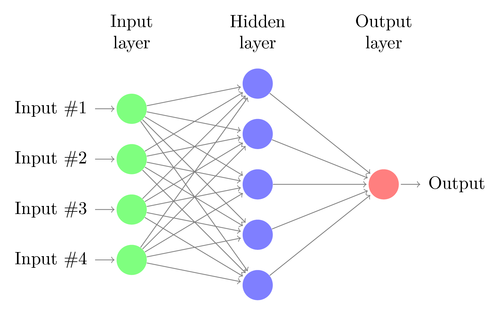

# Backpropagation

**역전파**란?  
역전파 알고리즘은 input과 output을 알고 있는 상태에서(이를 supervised learning이라 함) 신경망을 학습시키는 방법이다. 역전파 알고리즘을 적용시키기 이전에 MLP에 대해 몇가지 알아야할 것들이 있다.
1. 초기 가중치, weight값은 랜덤으로 주어진다.
2. 각각 노드, node는 하나의 퍼셉트론으로 생각한다. 즉, 노드를 지나칠 때마다 활성함수를 적용한다. 활성함수를 적용하기 이전을 net, 이후를 out이라고 하겠다. 다음 레이어의 계산에는 out값을 사용한다. 마지막 out이 output이 된다.
3. 활성함수는 시그모이드 sigmoid 함수로 한다. (미분하기 용이해서 대표적으로 쓰이는 함수이지만, 다른 활성함수가 아닌 다른 활성함수를 사용해도 문제 없다.)

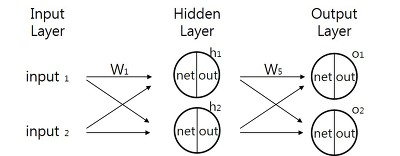

우리가 결과값으로 얻기를 바라는 값을 target, 실제로 얻은 결과값을 output이라하면, 오차 E는 다음과 같다.

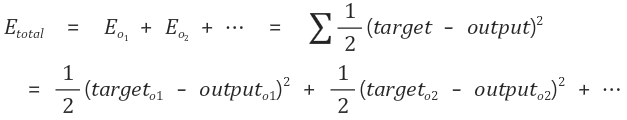

여기서 합(sum)의 의미는 모든 output(output1, output2 …)에서 발생한 오차를 모두 더해주는 것이다. 최종목적은 이 오차에 관한 함수 E의 함수값을 0에 근사시키는 것이다. 오차가 0에 가까워진다면, 신경망은 학습에 사용된 input들과 그에 유사한 input에 대해서 우리가 원하는 output, 정답이라고 할 수 있는 값들을 산출할 것이다.

역전파 알고리즘은?  
크게 4단계로 이루어져 있는데,
1. 기존에 설정되어있는 가중치를 사용해 net, out을 계산한다. (forward pass)
2. 전체 오차를 각 가중치로 편미분한 값을 기존의 가중치에서 빼준다.(오차를 줄인다. 편미분값을 더하면 최대값을 찾는 과정)
3. 모든 가중치에 대해 2를 실행한다.(output에 가까운 쪽에서부터 먼쪽으로)
4. 1~3을 학습 회수만큼 반복한다.  

한 번의 실행으로는 오차가 많이 줄어들지는 않으나, 여러번 반복해서 실행하면 오차가 0에 가까워진다.

# Code: Backpropagation

In [3]:
import torch

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
if device == 'cuda':
    torch.cuda.manual_seed_all(777)
else:
    torch.manual_seed(777)

In [5]:
def sigmoid(x):
    # sigmoid function
    return 1.0 / (1.0 + torch.exp(-x))
    # return torch.div(torch.tensor(1), torch.add(torch.tensor(1.0), torch.exp(-x)))

In [6]:
def sigmoid_prime(x):
    # derivative sigmoid function
    return sigmoid(x) * (1 - sigmoid(x))

In [13]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)
# nn layers
w1 = torch.Tensor(2, 2).to(device)
b1 = torch.Tensor(2).to(device)
w2 = torch.Tensor(2, 1).to(device)
b2 = torch.Tensor(1).to(device)
learning_rate = 1
for step in range(10001):
    # forward
    l1 = torch.add(torch.matmul(X, w1), b1)
    a1 = sigmoid(l1)
    l2 = torch.add(torch.matmul(a1, w2), b2)
    Y_pred = sigmoid(l2)
    
    # binary_cross_entropy loss
    cost = -torch.mean(Y * torch.log(Y_pred) + (1 - Y) * torch.log(1 - Y_pred))
    
    # Back prop (chain rule)
    # Loss derivative
    d_Y_pred = (Y_pred - Y) / (Y_pred * (1.0 - Y_pred) + 1e-7)
    
    # Layer 2
    d_l2 =  d_Y_pred * sigmoid_prime(l2)
    d_b2 = d_l2
    d_w2 = torch.matmul(torch.transpose(a1, 0, 1), d_b2)
    
    # Layer 1
    d_a1 = torch.matmul(d_b2, torch.transpose(w2, 0, 1))
    d_l1 =  d_a1 * sigmoid_prime(l1)
    d_b1 = d_l1
    d_w1 = torch.matmul(torch.transpose(X, 0, 1), d_b1)
    
    # Weight update
    w1 = w1 - learning_rate * d_w1
    b1 = b1 - learning_rate * torch.mean(d_b1, 0)
    w2 = w2 - learning_rate * d_w2
    b2 = b2 - learning_rate * torch.mean(d_b2, 0)
    
    if step % 100 == 0:
        print(step, cost.item())

0 0.8132616877555847
100 0.5142272114753723
200 0.03853989392518997
300 0.017614422366023064
400 0.011352245695888996
500 0.00835411436855793
600 0.006600319407880306
700 0.005451038479804993
800 0.0046404218301177025
900 0.004038388840854168
1000 0.0035737543366849422
1100 0.003204474225640297
1200 0.00290397135540843
1300 0.002654673997312784
1400 0.002444619545713067
1500 0.0022652132902294397
1600 0.0021102330647408962
1700 0.0019749589264392853
1800 0.0018559297313913703
1900 0.001750390394590795
2000 0.0016561250668019056
2100 0.00157148705329746
2200 0.0014950251206755638
2300 0.0014256321592256427
2400 0.0013623657869175076
2500 0.0013044481165707111
2600 0.001251266454346478
2700 0.0012021776055917144
2800 0.001156838028691709
2900 0.001114754006266594
3000 0.001075612148270011
3100 0.001039113150909543
3200 0.0010050033451989293
3300 0.0009730585152283311
3400 0.0009430844220332801
3500 0.0009148719254881144
3600 0.0008883163682185113
3700 0.0008632834069430828
3800 0.0008395

# Code: xor-nn

In [21]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)
# nn layers
linear1 = torch.nn.Linear(2, 2, bias=True)
linear2 = torch.nn.Linear(2, 1, bias=True)
sigmoid = torch.nn.Sigmoid()
# model
model = torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid).to(device)
# define cost/loss & optimizer
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # cost/loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        print(step, cost.item())

0 0.8614465594291687
100 0.6930066347122192
200 0.6925849318504333
300 0.6894930005073547
400 0.6601967811584473
500 0.5637608170509338
600 0.47203925251960754
700 0.3573346734046936
800 0.11411625891923904
900 0.05688459426164627
1000 0.036910295486450195
1100 0.02710331603884697
1200 0.02133595198392868
1300 0.017556410282850266
1400 0.01489521935582161
1500 0.012923291884362698
1600 0.01140536367893219
1700 0.010201824828982353
1800 0.00922483392059803
1900 0.008416290394961834
2000 0.007736333180218935
2100 0.007156721316277981
2200 0.006656938698142767
2300 0.006221615709364414
2400 0.005839183926582336
2500 0.005500460043549538
2600 0.0051985206082463264
2700 0.004927643574774265
2800 0.004683340899646282
2900 0.004461850970983505
3000 0.0042602247558534145
3100 0.004075816832482815
3200 0.0039065685123205185
3300 0.003750707022845745
3400 0.003606699872761965
3500 0.0034732415806502104
3600 0.0033491759095340967
3700 0.0032336628064513206
3800 0.0031257416121661663
3900 0.003024

In [22]:
# Accuracy computation
# True if hypothesis>0.5 else False
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('\nHypothesis: ', hypothesis.detach().cpu().numpy(), '\nCorrect: ', predicted.detach().cpu().numpy(), '\nAccuracy: ', accuracy.item())


Hypothesis:  [[1.3017117e-03]
 [9.9909627e-01]
 [9.9909198e-01]
 [9.3076332e-04]] 
Correct:  [[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:  1.0
